In [35]:
# ./문항_50000_Questions_Data.csv를 pandas로 읽기.
import pandas as pd
df = pd.read_csv('./문항_50000_Questions_Data.csv')# ./사전평가선제조건.csv를 pandas로 읽기.
df2 = pd.read_csv('./사전평가선제조건.csv')

In [ ]:
df.head()

In [ ]:
df2.head()

In [40]:
import pandas as pd
import numpy as np

def generate_exam_questions(df, df2):
    def sample_matching_rows(df, df2_row, used_item_codes):
        conditions = (
            (df['평가종류'] == df2_row['평가종류']) &
            (df['출제단계'] == df2_row['출제단계']) &
            (df['문항유형'] == df2_row['문항유형']) &
            (df['평가영역'] == df2_row['평가영역']) &
            (~df['문항코드'].isin(used_item_codes))
        )
        return df[conditions].sample(n=1) if not df[conditions].empty else None

    df3_rows = []
    used_item_codes = set()

    for _, df2_row in df2.iterrows():
        matched_df_row = sample_matching_rows(df, df2_row, used_item_codes)
        
        if matched_df_row is not None:
            item_code = matched_df_row['문항코드'].values[0]
            used_item_codes.add(item_code)
        else:
            item_code = np.nan

        df3_rows.append({
            '문제번호': df2_row['문제번호'],
            '문항코드': item_code,
            '평가종류': df2_row['평가종류'] if matched_df_row is None else matched_df_row['평가종류'].values[0],
            '배점': df2_row['배점'],
            '출제단계': df2_row['출제단계'] if matched_df_row is None else matched_df_row['출제단계'].values[0],
            '문항유형': df2_row['문항유형'] if matched_df_row is None else matched_df_row['문항유형'].values[0],
            '난이도': df2_row['난이도'],
            '평가영역': df2_row['평가영역'] if matched_df_row is None else matched_df_row['평가영역'].values[0],
            '평가항목': df2_row['평가항목']
        })

    df3 = pd.DataFrame(df3_rows)

    # 매칭되지 않은 행의 수 출력
    unmatched_rows = df3['문항코드'].isna().sum()
    if unmatched_rows > 0:
        print(f"주의: {unmatched_rows}개의 행에 대해 매칭되는 문항을 찾지 못했습니다.")
    
    return df3


In [42]:
exam1 = generate_exam_questions(df, df2)
exam2 = generate_exam_questions(df, df2)
exam3 = generate_exam_questions(df, df2)

In [46]:
# exam1, exam2, exam3를 csv 파일로 저장
exam1.to_csv('exam1.csv', index=False)
exam2.to_csv('exam2.csv', index=False)
exam3.to_csv('exam3.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np
# CSV 파일 읽기
examinees_df = pd.read_csv('수험자_1000.csv')
questions_df = pd.read_csv('exam1.csv')

# 30명의 수험자 랜덤 추출
selected_examinees = examinees_df.sample(n=30, random_state=42)

# 응답 데이터 생성 함수
def generate_response(examinee, questions):
    num_questions = len(questions)
    korean_level = examinee['한국어 수준']
    
    # 정규분포를 사용하여 점수 생성 (평균 70, 표준편차 20, 범위 0-100)
    score = np.clip(np.random.normal(70, 20), 0, 100)
    
    # 한국어 수준에 따른 정답률 조정
    base_correct_rate = score / 100
    correct_rate = base_correct_rate * (korean_level / 5)  # 한국어 수준 (1-5)에 따라 조정
    
    ox_list = np.random.choice(['O', 'X'], size=num_questions, p=[correct_rate, 1-correct_rate])
    
    selected_answers = []
    for q_type, ox in zip(questions['문항유형'], ox_list):
        if q_type == 1 and ox == 'O':
            selected_answers.append(np.random.randint(1, 5))  # 1~4 중 랜덤 선택
        else:
            selected_answers.append(0)
    
    result = '통과' if score >= 60 else ''
    
    return {
        '외국인 등록번호': examinee['외국인 등록번호'],
        '이름': examinee['이름'],
        'OX리스트': ''.join(ox_list),
        '선택답안': ','.join(map(str, selected_answers)),
        '점수': round(score, 2),
        '결과': result
    }

# 30명의 응답 데이터 생성
responses = [generate_response(examinee, questions_df) for _, examinee in selected_examinees.iterrows()]

# DataFrame으로 변환
response_df = pd.DataFrame(responses)

# 결과 출력 (첫 5개 행만)
print(response_df.head())

# CSV 파일로 저장
response_df.to_csv('응답_데이터.csv', index=False)
print("응답 데이터가 '응답_데이터.csv' 파일로 저장되었습니다.")

     외국인 등록번호         이름                                              OX리스트  \
0  3490941780    Gulnara  XXOXOXOXOOOXXXXXOXOXOXXXXOXXXXXOXXOOOXOXOXXOXX...   
1  4870107052    Dilnoza  XXXOXXOOOOOXOXXOOOXOOOOXOOXXOOXXOXOOOXOXXXOXXX...   
2  8426465635        Ali  XXOXXXXXXOXXXXXXXXOXXXXXXXXXXXXXXXOXOOXXXXXXOX...   
3  7784311902  Narantuya  OXXXXXXOXOXXXOXOXXXXXOOXXXXOXOXXOXOOXXOXXOXXOO...   
4  5452114233    Preecha  OOOXXXXOXOXOOXOXOXXXXOXXXOXXXXOXXOOXOXOXOOOXXX...   

                                                선택답안     점수   결과  나이 성별  \
0  0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...  61.67   통과  36  남   
1  0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...  79.25   통과  52  여   
2  0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...  36.26  NaN  18  남   
3  0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...  77.40   통과  37  남   
4  0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...  65.16   통과  18  남   

       국적 거주지    직업  한국어 수준  
0  우즈베키스탄  울산   노동자       2  
1  우즈베키스탄  광주 

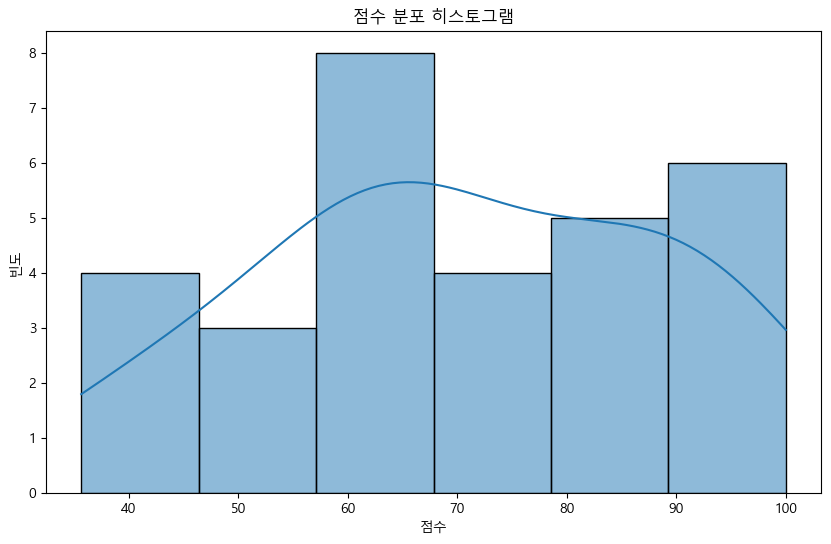

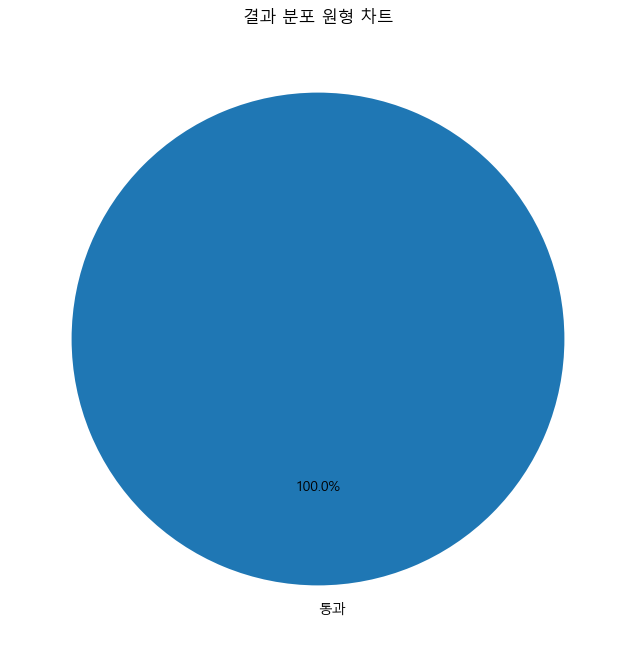

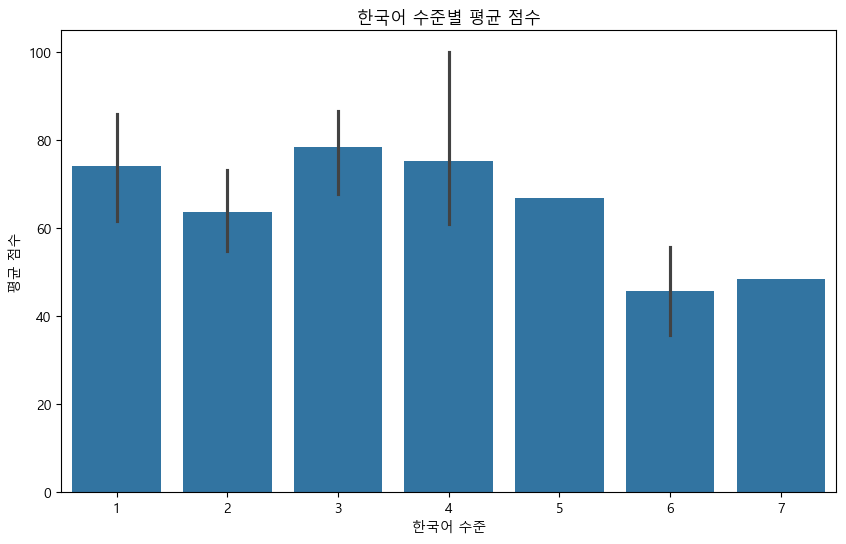

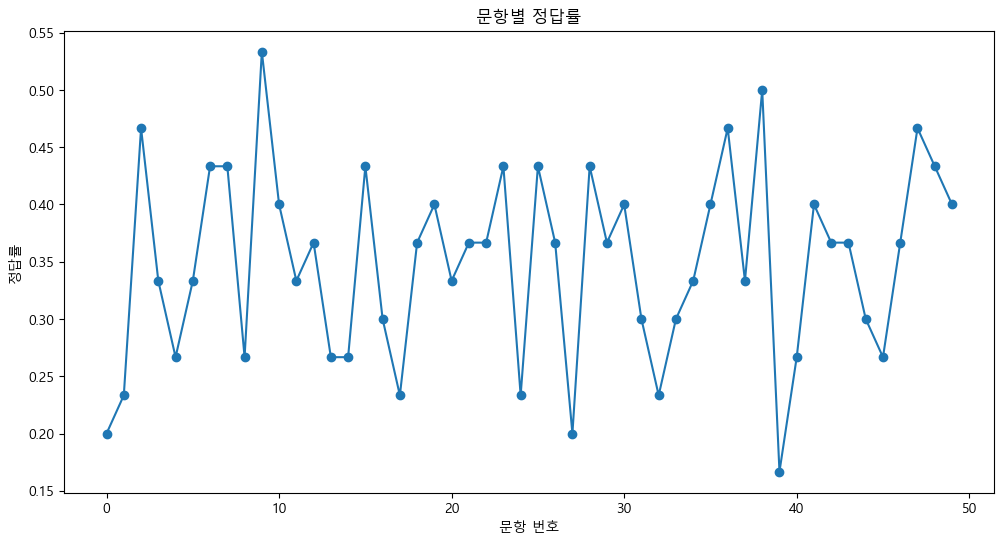

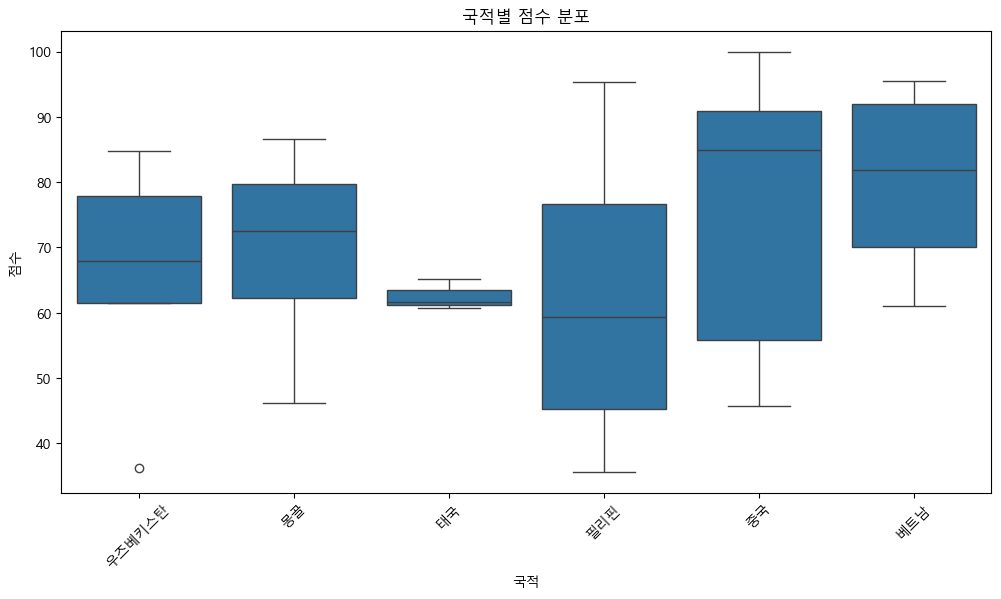

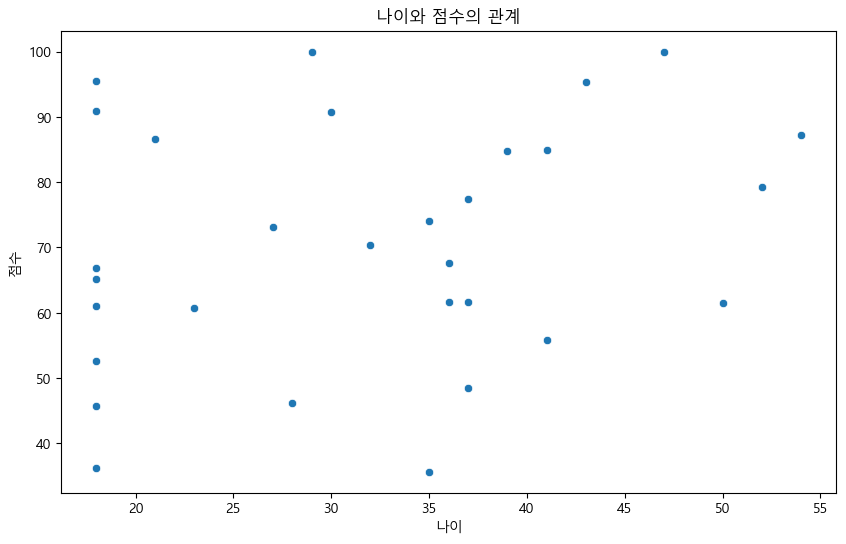

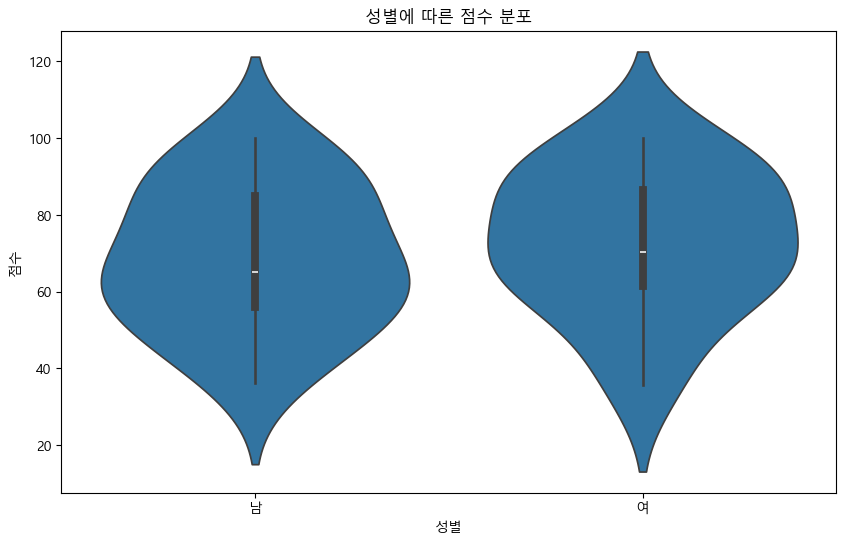

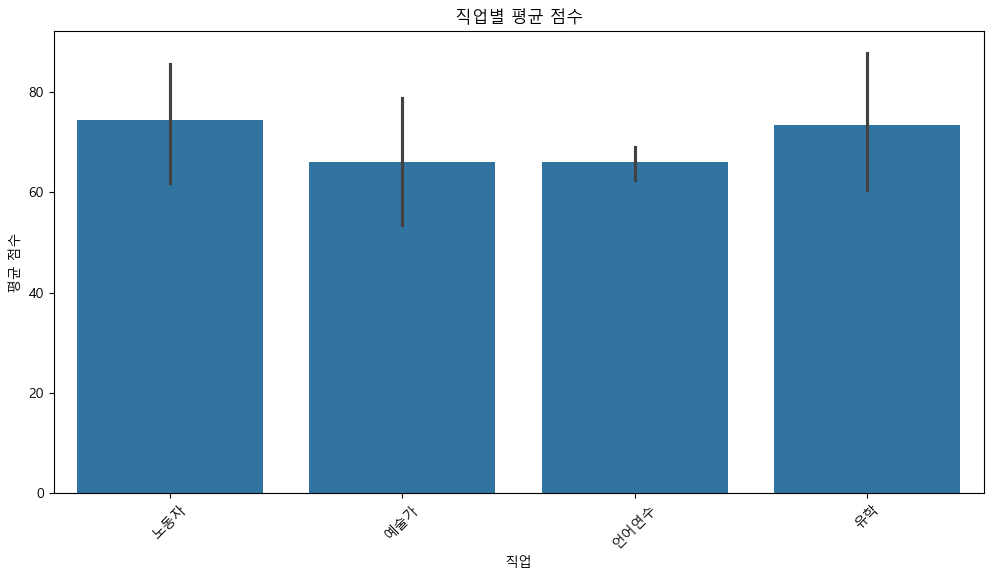

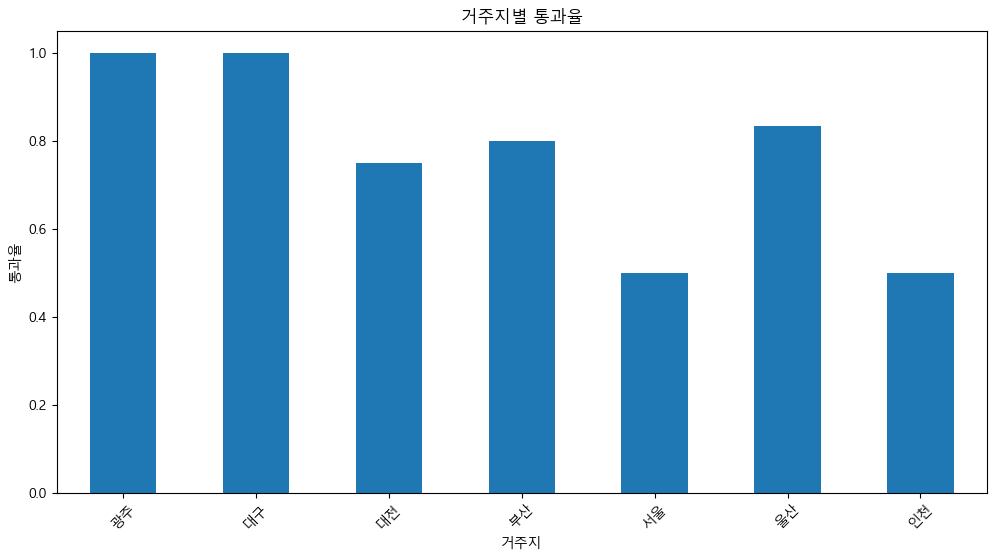

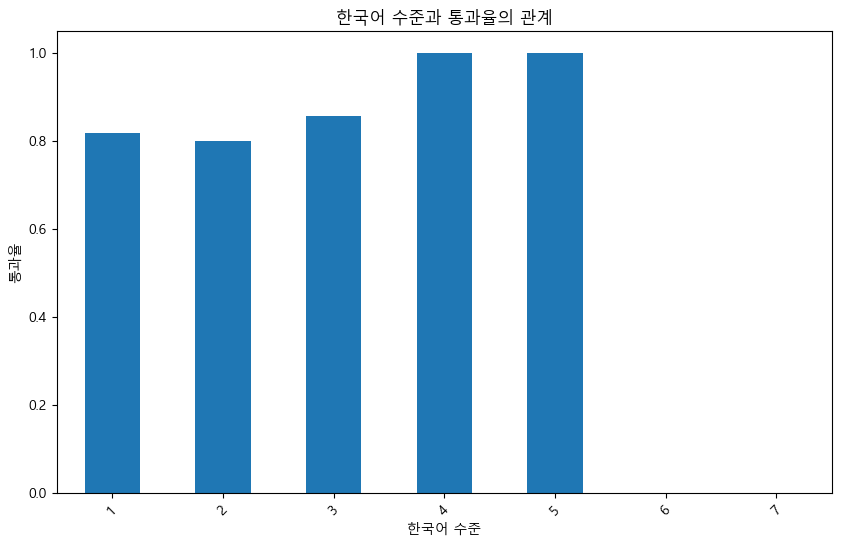

C:\Users\ldm\AppData\Local\Temp\ipykernel_13452\2524039388.py:114: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ox_data = ox_data.replace({'O': 1, 'X': 0})
c:\Users\ldm\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()
C:\Users\ldm\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


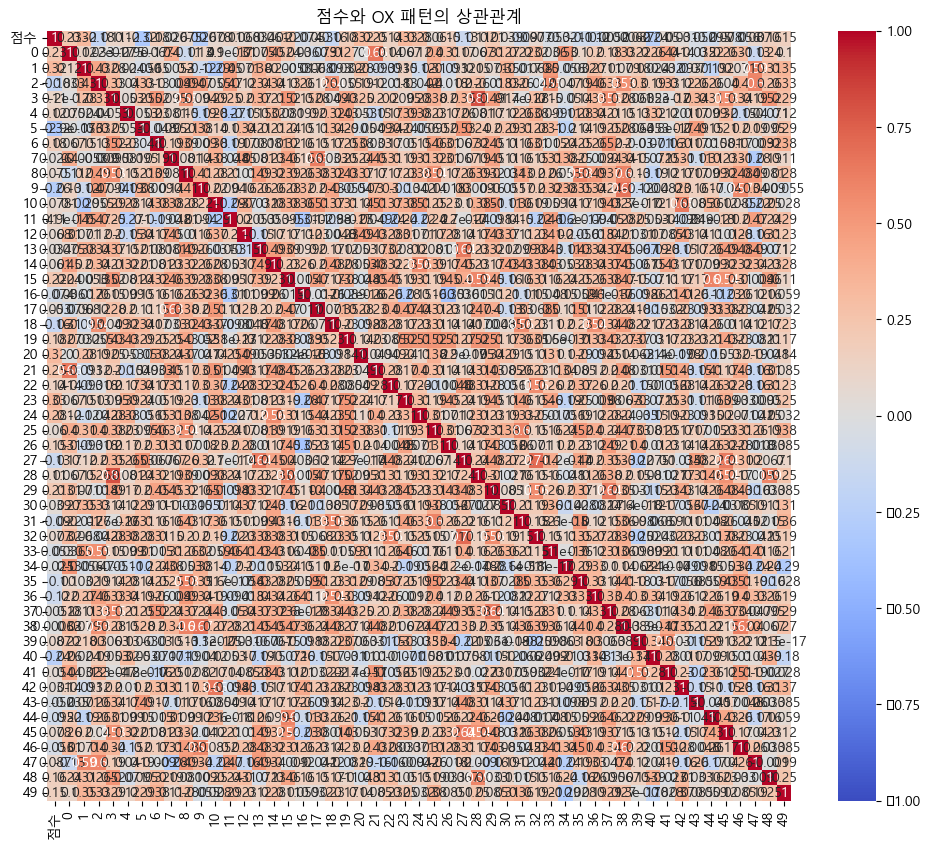

모든 시각화가 완료되었습니다.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 윈도우의 맑은 고딕 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 데이터 로드
response_df = pd.read_csv('응답_데이터.csv')
examinees_df = pd.read_csv('수험자_1000.csv')

# 데이터 병합
df = pd.merge(response_df, examinees_df, on=['외국인 등록번호', '이름'])

# 데이터 확인
print(df.head())
print(df.info())

# 1. 점수 분포 히스토그램
plt.figure(figsize=(10, 6))
sns.histplot(df['점수'], kde=True)
plt.title('점수 분포 히스토그램')
plt.xlabel('점수')
plt.ylabel('빈도')
plt.show()

# 2. 통과율 원형 차트
plt.figure(figsize=(8, 8))
pass_counts = df['결과'].value_counts()
plt.pie(pass_counts.values, labels=pass_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('결과 분포 원형 차트')
plt.show()

# 3. 한국어 수준별 평균 점수 막대 그래프
plt.figure(figsize=(10, 6))
sns.barplot(x='한국어 수준', y='점수', data=df)
plt.title('한국어 수준별 평균 점수')
plt.xlabel('한국어 수준')
plt.ylabel('평균 점수')
plt.show()

# 4. 문항별 정답률 선 그래프
ox_data = df['OX리스트'].apply(lambda x: pd.Series(list(x)))
correct_rates = (ox_data == 'O').mean()
plt.figure(figsize=(12, 6))
plt.plot(correct_rates.index, correct_rates.values, marker='o')
plt.title('문항별 정답률')
plt.xlabel('문항 번호')
plt.ylabel('정답률')
plt.show()

# 5. 국적별 평균 점수 박스 플롯
plt.figure(figsize=(12, 6))
sns.boxplot(x='국적', y='점수', data=df)
plt.title('국적별 점수 분포')
plt.xlabel('국적')
plt.ylabel('점수')
plt.xticks(rotation=45)
plt.show()

# 6. 나이와 점수의 산점도
plt.figure(figsize=(10, 6))
sns.scatterplot(x='나이', y='점수', data=df)
plt.title('나이와 점수의 관계')
plt.xlabel('나이')
plt.ylabel('점수')
plt.show()

# 7. 성별에 따른 점수 비교 바이올린 플롯
plt.figure(figsize=(10, 6))
sns.violinplot(x='성별', y='점수', data=df)
plt.title('성별에 따른 점수 분포')
plt.xlabel('성별')
plt.ylabel('점수')
plt.show()

# 8. 직업별 평균 점수 막대 그래프
plt.figure(figsize=(12, 6))
sns.barplot(x='직업', y='점수', data=df)
plt.title('직업별 평균 점수')
plt.xlabel('직업')
plt.ylabel('평균 점수')
plt.xticks(rotation=45)
plt.show()

# 9. 거주지별 통과율 막대 그래프
pass_rate = df.groupby('거주지')['결과'].apply(lambda x: (x == '통과').mean())
plt.figure(figsize=(12, 6))
pass_rate.plot(kind='bar')
plt.title('거주지별 통과율')
plt.xlabel('거주지')
plt.ylabel('통과율')
plt.xticks(rotation=45)
plt.show()

# 10. 문항 유형별 정답률 (데이터가 없으므로 스킵)

# 11. 한국어 수준과 통과율의 관계 (수정된 버전)
plt.figure(figsize=(10, 6))
pass_rate_by_level = df.groupby('한국어 수준')['결과'].apply(lambda x: (x == '통과').mean())
pass_rate_by_level.plot(kind='bar')
plt.title('한국어 수준과 통과율의 관계')
plt.xlabel('한국어 수준')
plt.ylabel('통과율')
plt.xticks(rotation=45)
plt.show()

# 12. 점수와 OX 패턴의 상관관계 매트릭스
ox_data = df['OX리스트'].apply(lambda x: pd.Series(list(x)))
ox_data = ox_data.replace({'O': 1, 'X': 0})
correlation_matrix = pd.concat([df['점수'], ox_data], axis=1).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('점수와 OX 패턴의 상관관계')
plt.show()

print("모든 시각화가 완료되었습니다.")